### Loading Dataset

In [94]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("AmesHousing.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Data Exploration 

In [97]:
# Basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [99]:
# Summary statistics
print(df.describe())

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

In [101]:
# Missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:\n", missing)

Columns with missing values:
 Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


In [103]:
# Correlation with target
corr = df.corr(numeric_only=True)
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10)
print("Top correlated features:\n", top_corr)

Top correlated features:
 SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64


In [105]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt


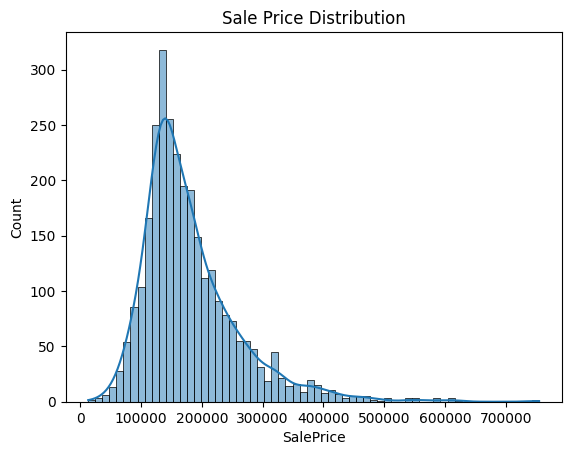

In [107]:
# Target distribution
sns.histplot(df['SalePrice'], kde=True)
plt.title("Sale Price Distribution")
plt.show()


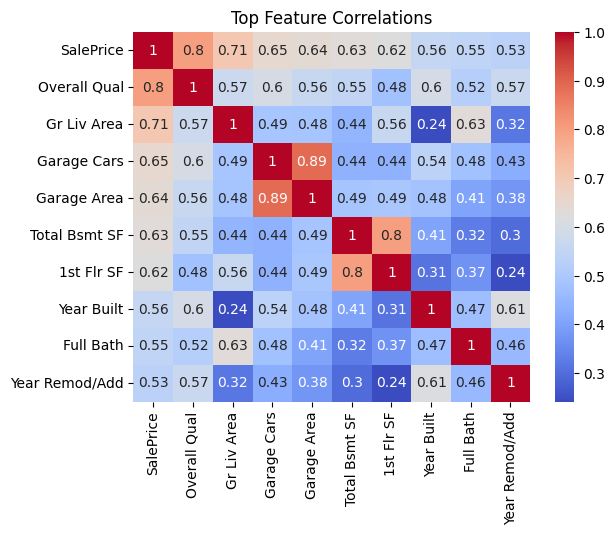

In [109]:
# Heatmap of top features
top_features = top_corr.index
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top Feature Correlations")
plt.show()

### Data Preprocessing 

In [112]:
# Drop columns with too many missing values
df.drop(['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu','Mas Vnr Type','Lot Frontage'], axis=1, inplace=True)

In [114]:
# Fill categorical nulls with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

### Feature Engineering 

In [64]:
# New features
df['TotalSF'] = df['Total Bsmt SF'] +df['1st Flr SF'] + df['2nd Flr SF']
df['Total Bathrooms'] = df['Full Bath'] + 0.5 * df['Half Bath'] + df['Bsmt Full Bath'] + 0.5 * df['Bsmt Half Bath']
df['House Age'] = df['Yr Sold'] - df['Year Built']

# Drop less useful features
df.drop(['PID', 'Year Built', 'Yr Sold', 'Garage Yr Blt'], axis=1, inplace=True)

In [66]:
#checking missing again 
missing = df.isnull().sum()
print("Total NaNs before encoding:", df.isnull().sum().sum())

Total NaNs before encoding: 36


In [68]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numeric columns with median
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Fill categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Final check
print("NaNs remaining:", df.isnull().sum().sum())  # should be 0

NaNs remaining: 0


### Linear Regression Model 

In [74]:
# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("📊 Linear Regression")
print("RMSE: Model ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


📊 Linear Regression
RMSE: 29286.861071773124
R² Score: 0.8930196315845127


### Random Forest 

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🌲 Random Forest Regressor")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


🌲 Random Forest Regressor
RMSE: 25578.18157446179
R² Score: 0.9183985704489499


### Sample Data 

In [78]:
sample_house = {
    'LotArea': 8450,
    'OverallQual': 7,
    'OverallCond': 5,
    'YearRemodAdd': 2003,
    'MasVnrArea': 196.0,
    'BsmtFinSF1': 706.0,
    'BsmtFinSF2': 0.0,
    'BsmtUnfSF': 150.0,
    'TotalBsmtSF': 856.0,
    '1stFlrSF': 856,
    '2ndFlrSF': 854,
    'GrLivArea': 1710,
    'BsmtFullBath': 1.0,
    'BsmtHalfBath': 0.0,
    'FullBath': 2,
    'HalfBath': 1,
    'BedroomAbvGr': 3,
    'KitchenAbvGr': 1,
    'TotRmsAbvGrd': 8,
    'Fireplaces': 0,
    'GarageCars': 2,
    'GarageArea': 548,
    'HouseAge': 7,  # If YrSold=2010, YearBuilt=2003
    'TotalSF': 2566,  # TotalBsmtSF + 1stFlrSF + 2ndFlrSF
    'TotalBathrooms': 3.5,  # Full + Half + BsmtFull + BsmtHalf

    # Sample categorical values (one-hot encoded during training)
    'MSZoning_RL': 1,
    'MSZoning_RM': 0,
    'MSZoning_C (all)': 0,
    'MSZoning_FV': 0,
    'MSZoning_RH': 0,

    'Neighborhood_CollgCr': 1,
    'Neighborhood_OldTown': 0,
    'Neighborhood_NAmes': 0,
    'Neighborhood_Edwards': 0,
    'Neighborhood_Somerst': 0,

    'ExterQual_TA': 1,
    'ExterQual_Gd': 0,
    'ExterQual_Ex': 0,

    'KitchenQual_TA': 1,
    'KitchenQual_Gd': 0,
    'KitchenQual_Ex': 0,

    'GarageType_Attchd': 1,
    'GarageType_Detchd': 0,
    'GarageType_BuiltIn': 0,

    'SaleCondition_Normal': 1,
    'SaleCondition_Abnorml': 0,
    'SaleCondition_Partial': 0,
}


In [89]:
def predict_house_price(new_data_dict, model, scaler, feature_columns):
    import pandas as pd
    # Step 1: Convert to DataFrame
    new_df = pd.DataFrame([new_data_dict])

    # Step 2: Align with training columns
    new_df = new_df.reindex(columns=feature_columns, fill_value=0)

    # Step 3: Scale
    new_scaled = scaler.transform(new_df)

    # Step 4: Predict
    predicted_price = model.predict(new_scaled)[0]
    return predicted_price


### Prediction

In [92]:
predicted_price = predict_house_price(sample_house, model=lr, scaler=scaler, feature_columns=X.columns)
print(f"💰 Predicted House Price: ${predicted_price:,.2f}")


💰 Predicted House Price: $-782,689.38
